## Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## EDA

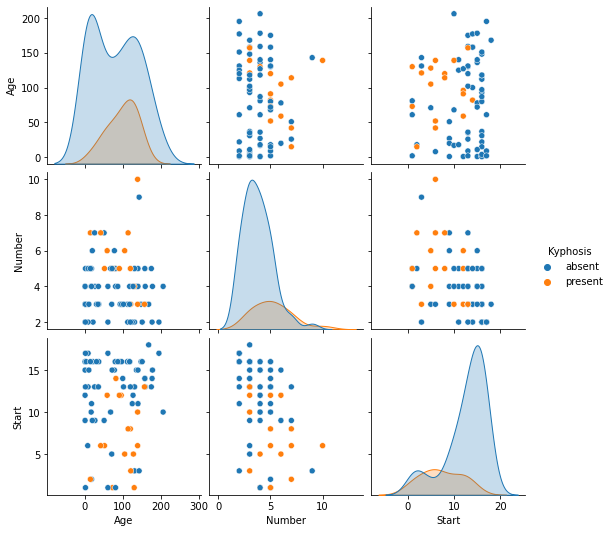

In [6]:
sns.pairplot(df, hue='Kyphosis')

## Train and Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis', axis = 1)

In [9]:
y = df['Kyphosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Decision Trees

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
predictions = dtree.predict(X_test)

## Predictions and Evaluations

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test, predictions))

[[14  4]
 [ 1  6]]


              precision    recall  f1-score   support

      absent       0.93      0.78      0.85        18
     present       0.60      0.86      0.71         7

    accuracy                           0.80        25
   macro avg       0.77      0.82      0.78        25
weighted avg       0.84      0.80      0.81        25



## Tree Visualization

In [27]:
from IPython.display import Image
from io import StringIO 
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

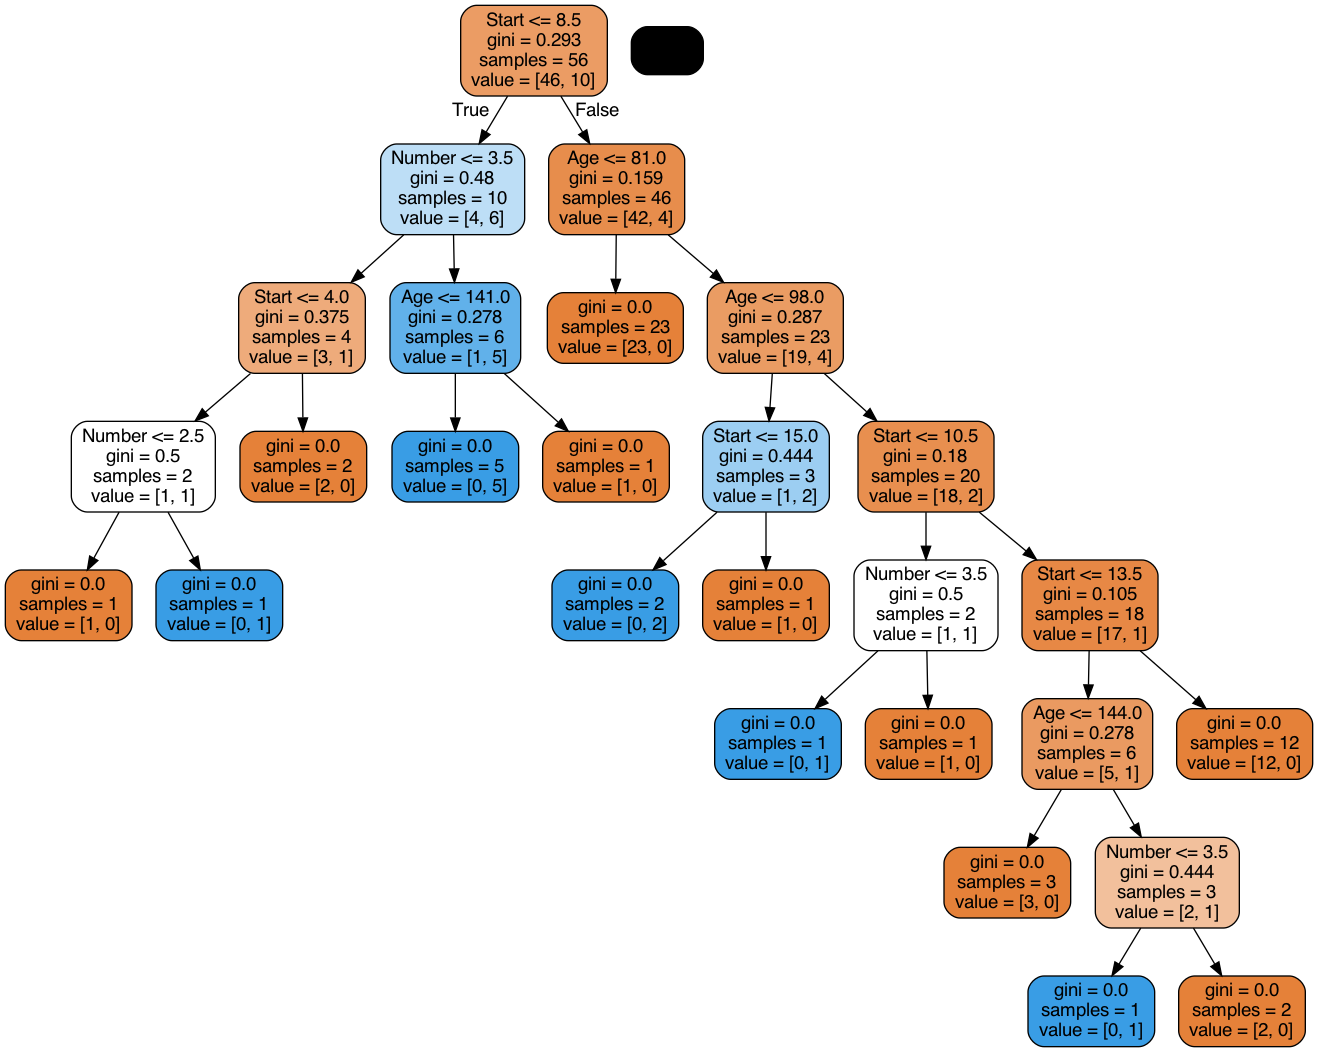

In [30]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=200)

In [21]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [23]:
rfc_predict = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test,rfc_predict))
print('\n')
print(classification_report(y_test, rfc_predict))

[[16  2]
 [ 2  5]]


              precision    recall  f1-score   support

      absent       0.89      0.89      0.89        18
     present       0.71      0.71      0.71         7

    accuracy                           0.84        25
   macro avg       0.80      0.80      0.80        25
weighted avg       0.84      0.84      0.84        25

